In [1]:
import os
import cv2 
import random as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Dropout

In [2]:
# Taking Cats and Dogs images from Drive
cats = os.listdir('/content/drive/My Drive/datasets/cats_dogs/cats')
dogs = os.listdir('/content/drive/My Drive/datasets/cats_dogs/dogs')
len(cats),len(dogs) # Checking length

(1012, 1013)

In [3]:
c = []
for i in cats:
  try:
    a =  cv2.imread(f'/content/drive/My Drive/datasets/cats_dogs/cats/{i}')
    b = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
    # img = cv2.resize(cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),(256,256))
    c.append(b)
  except(Exception) as e:
    print(e)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [4]:
d = []
for i in dogs:
  try:
    a =  cv2.imread(f'/content/drive/My Drive/datasets/cats_dogs/dogs/{i}')
    b = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
    # img = cv2.resize(cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),(256,256))
    d.append(b)
  except(Exception) as e:
    print(e)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



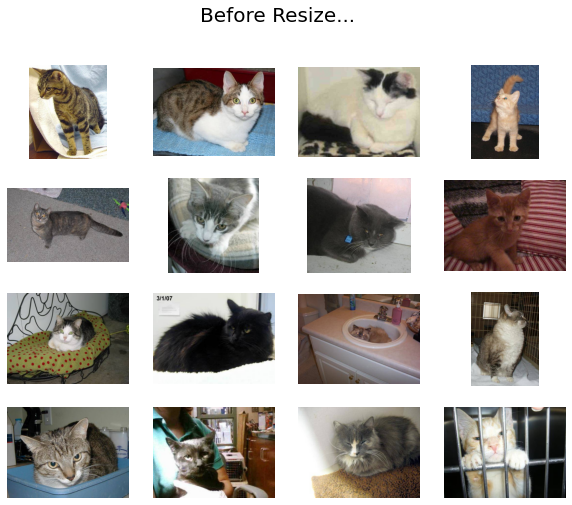

In [5]:
plt.figure(figsize=(10,8))
plt.suptitle('Before Resize...', size = 20)
for i in range(0,16) :
    plt.subplot(4,4,i+1)
    j = r.randint(0,len(c))
    plt.axis('off')
    # plt.tight_layout()
    plt.imshow(c[j])

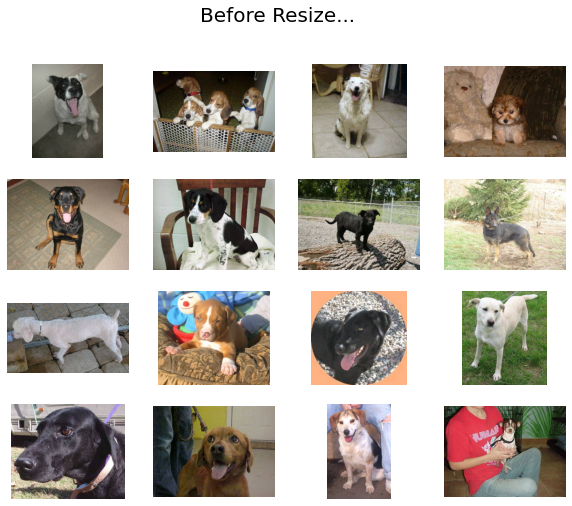

In [6]:
plt.figure(figsize=(10,8))
plt.suptitle('Before Resize...', size = 20)
for i in range(0,16) :
    plt.subplot(4,4,i+1)
    j = r.randint(0,len(d))
    plt.axis('off')
    # plt.tight_layout()
    plt.imshow(d[j])

In [7]:
# Reading and storing Cats and Dogs images

cat_data = []
dog_data = []
for i in cats:
  try:
    img1 =  cv2.imread(f'/content/drive/My Drive/datasets/cats_dogs/cats/{i}')
    img2 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img = cv2.resize(cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),(256,256))
    cat_data.append(img)
  except(Exception) as e:
    print(e)

for i in dogs:
  try:
    img1 =  cv2.imread(f'/content/drive/My Drive/datasets/cats_dogs/dogs/{i}')
    img2 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img = cv2.resize(cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),(256,256))
    dog_data.append(img)
  except(Exception) as e:
    print(e)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



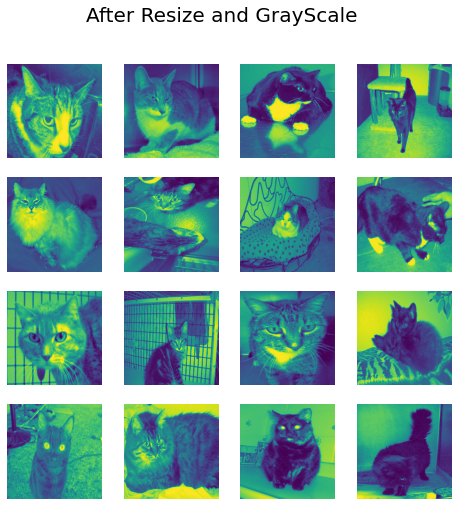

In [8]:
plt.figure(figsize=(8,8))
plt.suptitle('After Resize and GrayScale', size = 20)
for i in range(0,16) :
    plt.subplot(4,4,i+1)
    j = r.randint(0,len(cat_data))
    plt.axis('off')
    # plt.tight_layout()
    plt.imshow(cat_data[j])

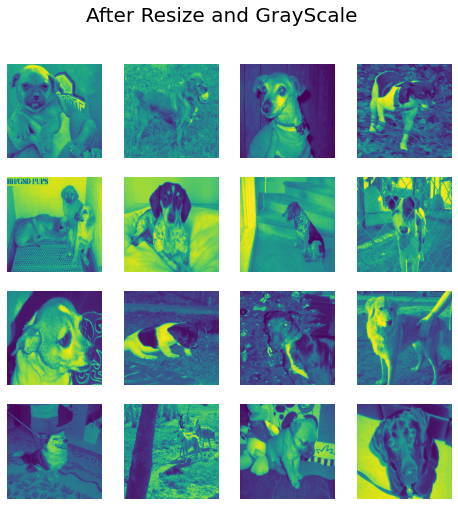

In [9]:
plt.figure(figsize=(8,8))
plt.suptitle('After Resize and GrayScale', size = 20)
for i in range(0,16) :
    plt.subplot(4,4,i+1)
    j = r.randint(0,len(dog_data))
    plt.axis('off')
    # plt.tight_layout()
    plt.imshow(dog_data[j])

In [10]:
# cat_data
# dog_data
len(cat_data),len(dog_data)

(1011, 1012)

In [11]:
# adding label value to images
cat_lab = list(zip(cat_data,[0 for x in range(len(cat_data))]))
dog_lab = list(zip(dog_data,[1 for x in range(len(dog_data))]))

In [12]:
cat_lab[1:5],dog_lab[1:5]

([(array([[156, 149, 147, ..., 142, 176, 185],
          [140, 132, 129, ..., 159, 180, 180],
          [123, 114, 113, ..., 180, 185, 178],
          ...,
          [192, 189, 185, ..., 131, 131, 133],
          [200, 196, 190, ..., 128, 129, 132],
          [206, 201, 194, ..., 124, 127, 132]], dtype=uint8), 0),
  (array([[ 81,  81,  76, ...,  11,  12,  12],
          [ 67,  72,  62, ...,  13,  14,  14],
          [ 58,  55,  81, ...,  13,  14,  15],
          ...,
          [ 84,  76,  74, ..., 163, 158, 157],
          [ 67,  65,  62, ..., 163, 161, 161],
          [ 56,  51,  49, ..., 162, 158, 155]], dtype=uint8), 0),
  (array([[201, 201, 201, ..., 237, 237, 237],
          [201, 201, 201, ..., 237, 237, 237],
          [201, 201, 201, ..., 237, 237, 237],
          ...,
          [174, 175, 177, ...,  63,  61,  86],
          [182, 179, 177, ...,  83,  90, 123],
          [185, 180, 174, ..., 103,  89, 100]], dtype=uint8), 0),
  (array([[ 72,  71,  72, ..., 131, 130, 131],
     

In [13]:
data = []
data.extend(cat_lab)
data.extend(dog_lab)
r.shuffle(data) # shuffling the Data
len(data)
# data

2023

In [14]:
train_fea = []
train_lab = []

valid_fea = []
valid_lab = []

test_fea = []
test_lab = []

for i in range(int(2023*0.75)): # taking 75% Data for traing
  train_fea.append(data[i][0])
  train_lab.append(data[i][1])
for j in range(int(2023*0.75),int(2023*0.75)+int(2023*0.05)): # taking 5% Data for validation
  valid_fea.append(data[j][0])
  valid_lab.append(data[j][1])
for k in range(int(2023*0.75)+int(2023*0.05),2023): # taking 20% Data for Testing
  test_fea.append(data[k][0])
  test_lab.append(data[k][1])


In [ ]:
print('train_fea :',len(train_fea))
print('train_lab :',len(train_lab))
print('valid_fea :',len(valid_fea))
print('valid_lab :',len(valid_lab))
print('test_fea :',len(test_fea))
print('test_lab :',len(test_lab))


train_fea : 1517
train_lab : 1517
valid_fea : 101
valid_lab : 101
test_fea : 405
test_lab : 405


In [ ]:
# Coverting Into Numpy Arrays

train_fea = np.array(train_fea)
train_lab = np.array(train_lab)

valid_fea = np.array(valid_fea)
valid_lab = np.array(valid_lab)

test_fea = np.array(test_fea)
test_lab = np.array(test_lab)

In [ ]:
train_fea.shape

(1517, 256, 256)

In [ ]:
# reshaping features
train_fea = train_fea.reshape((train_fea.shape[0],256,256,1))
valid_fea = valid_fea.reshape((valid_fea.shape[0],256,256,1))
test_fea = test_fea.reshape((test_fea.shape[0],256,256,1))

In [ ]:
train_fea.shape

(1517, 256, 256, 1)

In [ ]:
'''model = Sequential()
model.add(Conv2D(24,(3,3), input_shape = (180,180,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(24,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(24,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(24,activation='relu'))
model.add(Dense(2,activation='softmax'))'''

"model = Sequential()\nmodel.add(Conv2D(24,(3,3), input_shape = (180,180,1)))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Conv2D(24,(3,3),activation='relu'))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Conv2D(24,(3,3),activation='relu'))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Flatten())\nmodel.add(Dense(24,activation='relu'))\nmodel.add(Dense(2,activation='softmax'))"

In [ ]:
model = Sequential([Conv2D(64,(3,3), input_shape = (256,256,1)),
                    MaxPool2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPool2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPool2D(2,2),
                    Flatten(),
                    Dense(28,activation='relu'),
                    Dense(2,activation='softmax')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 120)     1200      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 120)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 80)      86480     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 80)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        46144     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)            

In [ ]:
#Compiling
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
epoch = model.fit(train_fea,train_lab,epochs=10,batch_size = 32,validation_data=(valid_fea,valid_lab),verbose=1)

Epoch 1/10
48/48 [==============================] - 404s 8s/step - loss: 32.5839 - accuracy: 0.5194 - val_loss: 0.6979 - val_accuracy: 0.4851
Epoch 2/10
48/48 [==============================] - 406s 8s/step - loss: 0.6729 - accuracy: 0.5887 - val_loss: 0.6626 - val_accuracy: 0.6139
Epoch 3/10
48/48 [==============================] - 406s 8s/step - loss: 0.5207 - accuracy: 0.7488 - val_loss: 0.8947 - val_accuracy: 0.5644
Epoch 4/10
48/48 [==============================] - 404s 8s/step - loss: 0.3655 - accuracy: 0.8372 - val_loss: 0.8707 - val_accuracy: 0.6040
Epoch 5/10
48/48 [==============================] - 406s 8s/step - loss: 0.2577 - accuracy: 0.8906 - val_loss: 0.8900 - val_accuracy: 0.5842
Epoch 6/10
48/48 [==============================] - 406s 8s/step - loss: 0.1376 - accuracy: 0.9466 - val_loss: 1.1606 - val_accuracy: 0.5446
Epoch 7/10
48/48 [==============================] - 403s 8s/step - loss: 0.0829 - accuracy: 0.9697 - val_loss: 1.4919 - val_accuracy: 0.5545
Epoch 8/10
4

In [ ]:
model.evaluate(test_fea,test_lab,verbose = 1)

13/13 [==============================] - 26s 2s/step - loss: 2.4314 - accuracy: 0.5457


[2.431429386138916, 0.5456790328025818]

In [ ]:
history = epoch.history

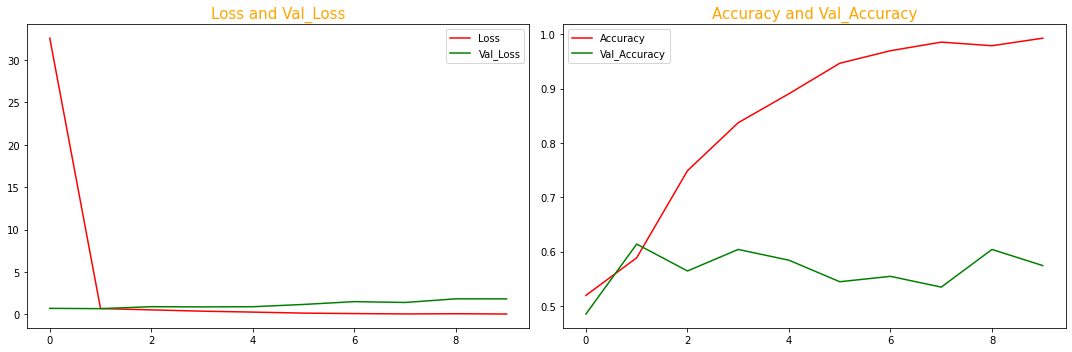

In [ ]:
 #Plotting the Loss & Val_Loss , Accuracy & Val_Accuracy
plt.figure(figsize = (15,5)),
plt.subplot(1,2,1)
plt.plot(history['loss'], color = 'r')
plt.plot(history['val_loss'], color = 'g')
plt.title('Loss and Val_Loss', size = 15,color = 'orange')
plt.legend(['Loss','Val_Loss'])

plt.subplot(1,2,2)
plt.plot(history['accuracy'], color = 'r')
plt.plot(history['val_accuracy'], color = 'g')
plt.title('Accuracy and Val_Accuracy', size = 15, color = 'orange')
plt.tight_layout()
plt.legend(['Accuracy','Val_Accuracy'])
plt.show()

In [ ]:
def prediction(x):
  read = cv2.imread(x)
  color = cv2.cvtColor(read,cv2.COLOR_BGR2RGB)
  size = cv2.resize((cv2.cvtColor(color,cv2.COLOR_RGB2GRAY)),(256,256))
  image = np.array(size)
  res_img = image.reshape(1,256,256,1)
  return res_img


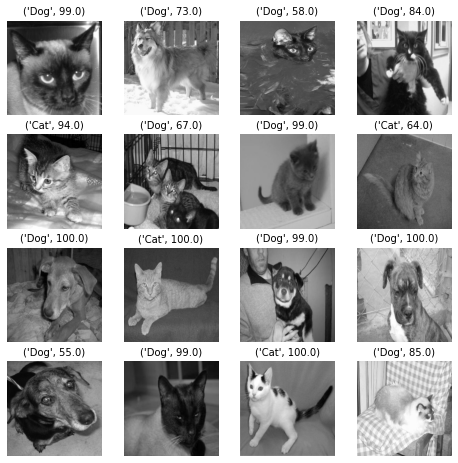

In [ ]:
plt.figure(figsize = (8,8))
for i in range(0,16):
  plt.subplot(4,4,i+1)
  change = test_fea[i].reshape(1,256,256,1)
  pre1 = model.predict(change)
  img = change.reshape(256,256)
  img1 = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
  image = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
  def x():
    if np.argmax(pre1)==0:
      return 'Cat',round(pre1.max()*100)
    else:
      return  'Dog',round(pre1.max()*100)
  plt.imshow(image)
  plt.axis('off')
  plt.title(x(),size = 10)
